In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# 1. Probability of Drawdown
def calculate_drawdown(prices):
    # Calculate the cumulative max of the stock prices
    cumulative_max = prices.cummax()
    
    # Calculate drawdown as the percentage decline from the peak
    drawdown = (prices - cumulative_max) / cumulative_max
    return drawdown

# Probability of Drawdown exceeding a threshold
def probability_of_drawdown(prices, threshold):
    drawdown = calculate_drawdown(prices)
    prob_drawdown = (drawdown <= -threshold).mean()  # Probability of drawdown exceeding threshold
    return prob_drawdown

# 2. Probability of Recovery from a Drawdown
def probability_of_recovery(prices, recovery_periods):
    drawdown = calculate_drawdown(prices)
    
    # Define the recovery as returning to the previous peak (drawdown == 0)
    recovery = (drawdown == 0).rolling(window=recovery_periods).sum() > 0
    prob_recovery = recovery.mean()
    
    return prob_recovery

# 3. Bayesian Analysis Probability
# Prior, likelihood, and updating the probability using Bayes' Theorem
def bayesian_update(prior, likelihood_positive, likelihood_negative, evidence_positive):
    # P(H|E) = P(E|H) * P(H) / P(E)
    posterior_positive = (likelihood_positive * prior) / evidence_positive
    posterior_negative = (likelihood_negative * (1 - prior)) / (1 - evidence_positive)
    
    # Normalizing to ensure probabilities sum to 1
    normalization_factor = posterior_positive + posterior_negative
    posterior_positive /= normalization_factor
    posterior_negative /= normalization_factor
    
    return posterior_positive, posterior_negative

# Main function
def stock_analysis(prices, drawdown_threshold, recovery_periods, prior, likelihood_positive, likelihood_negative, evidence_positive):
    # Calculate Probability of Drawdown
    prob_drawdown = probability_of_drawdown(prices, drawdown_threshold)
    
    # Calculate Probability of Recovery from Drawdown
    prob_recovery = probability_of_recovery(prices, recovery_periods)
    
    # Bayesian Analysis for future stock movement
    posterior_positive, posterior_negative = bayesian_update(prior, likelihood_positive, likelihood_negative, evidence_positive)
    
    return {
        "Probability of Drawdown": prob_drawdown,
        "Probability of Recovery": prob_recovery,
        "Posterior Positive (Bayesian)": posterior_positive,
        "Posterior Negative (Bayesian)": posterior_negative
    }

# Example usage
# Suppose we have a dataframe of daily closing prices for a stock
data = {
    "Date": pd.date_range(start="2023-01-01", periods=10, freq='D'),
    "Price": [100, 105, 101, 110, 108, 112, 111, 120, 119, 115]
}
df = pd.DataFrame(data)
prices = df["Price"]

# Parameters for Bayesian Analysis
prior = 0.5  # Initial belief of a positive outcome
likelihood_positive = 0.7  # Likelihood of evidence given a positive outcome
likelihood_negative = 0.3  # Likelihood of evidence given a negative outcome
evidence_positive = 0.6  # Evidence in favor of a positive outcome

# Perform analysis
result = stock_analysis(prices, drawdown_threshold=0.05, recovery_periods=3, prior=prior,
                        likelihood_positive=likelihood_positive, likelihood_negative=likelihood_negative,
                        evidence_positive=evidence_positive)

# Print results
print("Stock Analysis Results:")
for key, value in result.items():
    print(f"{key}: {value:.4f}")

Stock Analysis Results:
Probability of Drawdown: 0.0000
Probability of Recovery: 0.8000
Posterior Positive (Bayesian): 0.6087
Posterior Negative (Bayesian): 0.3913


In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Function to calculate daily returns
def calculate_returns(prices):
    returns = prices.pct_change().dropna()
    return returns

# Function to calculate expected return
def calculate_expected_return(returns):
    return returns.mean()

# Function to calculate volatility (risk assessment)
def calculate_volatility(returns):
    return returns.std()

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(expected_return, risk_free_rate, volatility):
    return (expected_return - risk_free_rate) / volatility

# Function to calculate probability of positive return
def probability_of_positive_return(expected_return, volatility):
    prob_positive = 1 - norm.cdf(0, expected_return, volatility)
    return prob_positive

# Function to update probability using Bayes' Theorem
def bayesian_update(prior, likelihood_positive, likelihood_negative, evidence_positive):
    posterior_positive = (likelihood_positive * prior) / evidence_positive
    posterior_negative = (likelihood_negative * (1 - prior)) / (1 - evidence_positive)
    
    # Normalizing to ensure probabilities sum to 1
    normalization_factor = posterior_positive + posterior_negative
    posterior_positive /= normalization_factor
    posterior_negative /= normalization_factor
    
    return posterior_positive, posterior_negative

# Example usage with historical stock prices
data = {
    "Date": pd.date_range(start="2023-01-01", periods=10, freq='D'),
    "Price": [100, 102, 101, 105, 108, 107, 110, 111, 115, 114]
}
df = pd.DataFrame(data)
prices = df["Price"]

# Calculate returns, expected return, and volatility
returns = calculate_returns(prices)
expected_return = calculate_expected_return(returns)
volatility = calculate_volatility(returns)

# Parameters for Bayesian Analysis
prior = 0.5  # Initial belief
likelihood_positive = 0.7  # Likelihood of positive news
likelihood_negative = 0.3  # Likelihood of negative news
evidence_positive = 0.6  # Evidence in favor of a positive outcome

# Calculate probability of positive return and Sharpe ratio
risk_free_rate = 0.02  # Example risk-free rate
sharpe_ratio = calculate_sharpe_ratio(expected_return, risk_free_rate, volatility)
prob_positive_return = probability_of_positive_return(expected_return, volatility)

# Bayesian updating based on new evidence
posterior_positive, posterior_negative = bayesian_update(prior, likelihood_positive, likelihood_negative, evidence_positive)

# Display results
print(f"Expected Return: {expected_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Probability of Positive Return: {prob_positive_return:.4f}")
print(f"Posterior Positive (Buy): {posterior_positive:.4f}")
print(f"Posterior Negative (Sell): {posterior_negative:.4f}")

Expected Return: 0.0148
Volatility: 0.0201
Sharpe Ratio: -0.2568
Probability of Positive Return: 0.7700
Posterior Positive (Buy): 0.6087
Posterior Negative (Sell): 0.3913


Expected Return: 0.0148
Volatility: 0.0201
Probability of Profit: 0.7700
Odds of Profit: 3.3488


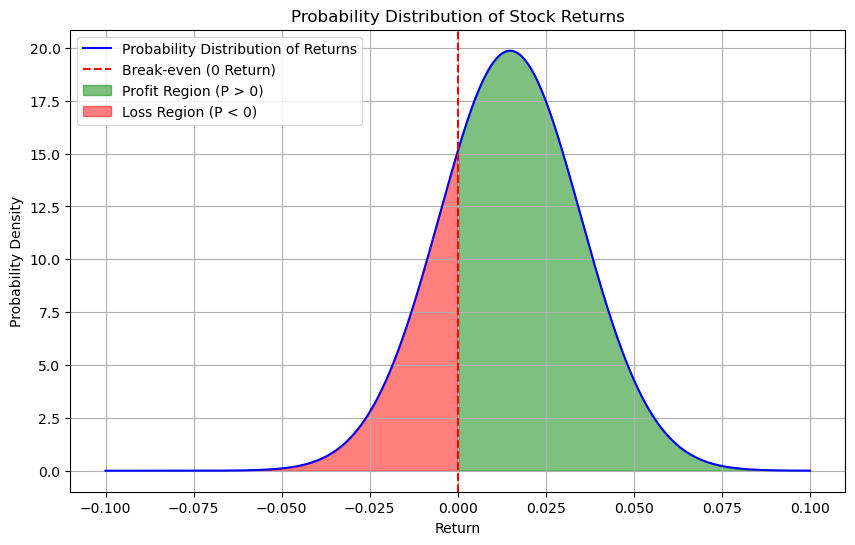

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate returns
def calculate_returns(prices):
    returns = prices.pct_change().dropna()
    return returns

# Function to calculate expected return and volatility
def calculate_expected_return_and_volatility(returns):
    expected_return = returns.mean()
    volatility = returns.std()
    return expected_return, volatility

# Function to calculate probability of profit
def probability_of_profit(expected_return, volatility):
    prob_profit = 1 - norm.cdf(0, expected_return, volatility)
    return prob_profit

# Function to calculate odds of profit
def odds_of_profit(prob_profit):
    prob_loss = 1 - prob_profit
    odds = prob_profit / prob_loss
    return odds

# Example usage with historical stock prices
data = {
    "Date": pd.date_range(start="2023-01-01", periods=10, freq='D'),
    "Price": [100, 102, 101, 105, 108, 107, 110, 111, 115, 114]
}
df = pd.DataFrame(data)
prices = df["Price"]

# Calculate returns
returns = calculate_returns(prices)

# Calculate expected return and volatility
expected_return, volatility = calculate_expected_return_and_volatility(returns)

# Calculate probability of profit and odds
prob_profit = probability_of_profit(expected_return, volatility)
odds_profit = odds_of_profit(prob_profit)

# Print results
print(f"Expected Return: {expected_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Probability of Profit: {prob_profit:.4f}")
print(f"Odds of Profit: {odds_profit:.4f}")

# Plot the normal distribution of stock returns
x = np.linspace(-0.1, 0.1, 1000)  # Define a range of returns for the x-axis
pdf = norm.pdf(x, expected_return, volatility)

# Create a probability distribution plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Probability Distribution of Returns", color="blue")
plt.axvline(0, color='red', linestyle='--', label="Break-even (0 Return)")
plt.fill_between(x, 0, pdf, where=(x > 0), color='green', alpha=0.5, label="Profit Region (P > 0)")
plt.fill_between(x, 0, pdf, where=(x <= 0), color='red', alpha=0.5, label="Loss Region (P < 0)")
plt.title("Probability Distribution of Stock Returns")
plt.xlabel("Return")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

Expected Return: 0.0148
Volatility: 0.0201
Z-Value: -0.7390
Probability of Profit: 0.7700
Odds of Profit: 3.3488


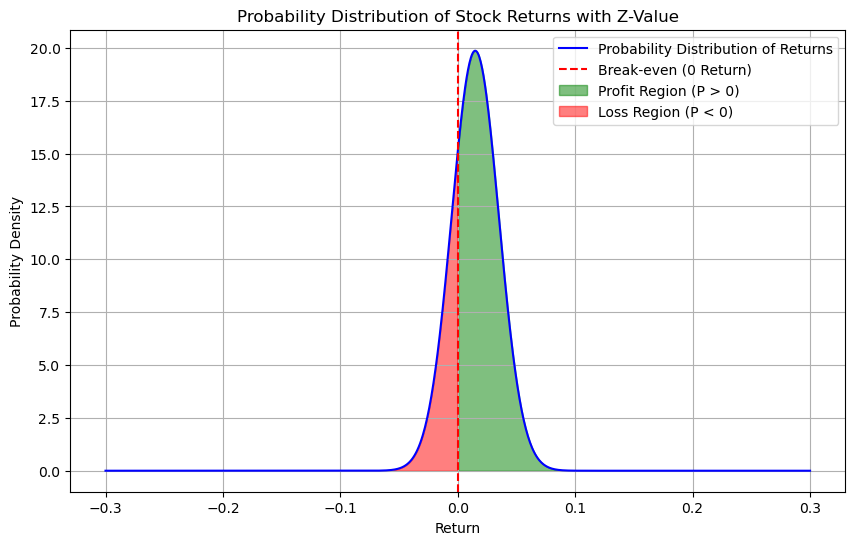

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function to calculate returns
def calculate_returns(prices):
    returns = prices.pct_change().dropna()
    return returns

# Function to calculate expected return and volatility
def calculate_expected_return_and_volatility(returns):
    expected_return = returns.mean()
    volatility = returns.std()
    return expected_return, volatility

# Function to calculate z-value
def calculate_z_value(expected_return, volatility):
    z_value = -expected_return / volatility  # X = 0 for break-even
    return z_value

# Function to calculate probability of profit using z-value
def probability_of_profit(z_value):
    prob_profit = 1 - norm.cdf(z_value)  # Using CDF of the standard normal distribution
    return prob_profit

# Function to calculate odds of profit
def odds_of_profit(prob_profit):
    prob_loss = 1 - prob_profit
    odds = prob_profit / prob_loss
    return odds

# Example usage with historical stock prices
data = {
    "Date": pd.date_range(start="2023-01-01", periods=10, freq='D'),
    "Price": [100, 102, 101, 105, 108, 107, 110, 111, 115, 114]
}
df = pd.DataFrame(data)
prices = df["Price"]

# Calculate returns
returns = calculate_returns(prices)

# Calculate expected return and volatility
expected_return, volatility = calculate_expected_return_and_volatility(returns)

# Calculate z-value
z_value = calculate_z_value(expected_return, volatility)

# Calculate probability of profit and odds
prob_profit = probability_of_profit(z_value)
odds_profit = odds_of_profit(prob_profit)

# Print results
print(f"Expected Return: {expected_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Z-Value: {z_value:.4f}")
print(f"Probability of Profit: {prob_profit:.4f}")
print(f"Odds of Profit: {odds_profit:.4f}")

# Plotting the probability distribution and z-value
x = np.linspace(-0.3, 0.3, 1000)
pdf = norm.pdf(x, expected_return, volatility)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Probability Distribution of Returns", color="blue")
plt.axvline(0, color='red', linestyle='--', label="Break-even (0 Return)")
plt.fill_between(x, 0, pdf, where=(x > 0), color='green', alpha=0.5, label="Profit Region (P > 0)")
plt.fill_between(x, 0, pdf, where=(x <= 0), color='red', alpha=0.5, label="Loss Region (P < 0)")
plt.title("Probability Distribution of Stock Returns with Z-Value")
plt.xlabel("Return")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Simulated stock data
data = {
    "Date": pd.date_range(start="2023-01-01", periods=100, freq='D'),
    "Price": np.random.normal(loc=100, scale=2, size=100).cumsum()  # Random walk to simulate stock prices
}
df = pd.DataFrame(data)
prices = df["Price"]

# Step 1: Calculate historical returns
def calculate_returns(prices):
    returns = prices.pct_change().dropna()
    return returns

# Step 2: Estimate prior probability of positive returns
def calculate_prior(returns):
    prior = np.mean(returns > 0)  # Proportion of positive returns
    return prior

# Step 3: Calculate likelihoods based on recent market behavior
def calculate_likelihoods(returns, window=10):
    # Calculate volatility and momentum to estimate likelihoods
    recent_returns = returns[-window:]  # Last `window` days of returns
    recent_volatility = recent_returns.std()
    recent_momentum = np.mean(recent_returns > 0)
    
    # Assume:
    # Likelihood of positive returns is higher when momentum is positive
    likelihood_positive = norm.cdf(0, loc=recent_momentum, scale=recent_volatility)  # Simplified
    likelihood_negative = 1 - likelihood_positive  # Complementary likelihood
    
    return likelihood_positive, likelihood_negative

# Step 4: Calculate evidence based on recent market behavior
def calculate_evidence(returns, window=10):
    # Use moving average crossover as evidence (simplified for now)
    short_ma = prices.rolling(window=window).mean().iloc[-1]  # Short-term average
    long_ma = prices.rolling(window=2*window).mean().iloc[-1]  # Long-term average
    if short_ma > long_ma:
        evidence_positive = 0.7  # If short MA > long MA, assume market trend is positive
    else:
        evidence_positive = 0.3  # If short MA <= long MA, assume market trend is negative
    
    return evidence_positive

# Bayesian update function
def bayesian_update(prior, likelihood_positive, likelihood_negative, evidence_positive):
    posterior_positive = (likelihood_positive * prior) / evidence_positive
    posterior_negative = (likelihood_negative * (1 - prior)) / (1 - evidence_positive)
    
    # Normalizing to ensure probabilities sum to 1
    normalization_factor = posterior_positive + posterior_negative
    posterior_positive /= normalization_factor
    posterior_negative /= normalization_factor
    
    return posterior_positive, posterior_negative

# Step 5: Perform the calculations dynamically
# 1. Calculate returns
returns = calculate_returns(prices)

# 2. Calculate prior probability based on historical performance
prior = calculate_prior(returns)

# 3. Calculate likelihoods based on recent data
likelihood_positive, likelihood_negative = calculate_likelihoods(returns)

# 4. Calculate evidence from recent stock behavior
evidence_positive = calculate_evidence(returns)

# 5. Calculate posterior probabilities using Bayesian update
posterior_positive, posterior_negative = bayesian_update(prior, likelihood_positive, likelihood_negative, evidence_positive)

# Print results
print(f"Prior Probability of Positive Return: {prior:.4f}")
print(f"Likelihood of Positive Performance: {likelihood_positive:.4f}")
print(f"Likelihood of Negative Performance: {likelihood_negative:.4f}")
print(f"Evidence Positive: {evidence_positive:.4f}")
print(f"Posterior Probability of Positive Return: {posterior_positive:.4f}")
print(f"Posterior Probability of Negative Return: {posterior_negative:.4f}")

Prior Probability of Positive Return: 1.0000
Likelihood of Positive Performance: 0.0000
Likelihood of Negative Performance: 1.0000
Evidence Positive: 0.7000
Posterior Probability of Positive Return: nan
Posterior Probability of Negative Return: nan


C:\Users\sudhi\AppData\Local\Temp\ipykernel_14160\1676817138.py:56: RuntimeWarning: invalid value encountered in scalar divide
  posterior_positive /= normalization_factor
C:\Users\sudhi\AppData\Local\Temp\ipykernel_14160\1676817138.py:57: RuntimeWarning: invalid value encountered in scalar divide
  posterior_negative /= normalization_factor
